
"""
# Customer Segmentation using K-Means and PCA

We will see how to segment customers from a retail dataset using K-Means clustering. 

We will:
1. **Visualize the Raw Data** – Understand the distribution of transactions.
2. **Aggregate Data** – Group transactions by customer.
3. **Apply K-Means Clustering** – Observe how customers group based on purchase behavior.
4. **Apply PCA and Visualize** – Reduce the data to 2 dimensions to see cluster separation.
5. **Conclude** – Summarize insights learned from the analysis.

Each cell is explained in detail.
"""


"""
## 1. Import Libraries

We import the necessary libraries for data processing, visualization, and machine learning:
- **pandas & numpy**: For data manipulation.
- **matplotlib & seaborn**: For plotting.
- **scikit-learn (KMeans, StandardScaler, PCA)**: For clustering, data scaling, and dimensionality reduction.
"""



In [18]:

import pandas as pd          # Data manipulation and analysis
import numpy as np           # Numerical operations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns        # Advanced plotting with attractive defaults
from sklearn.cluster import KMeans   # K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # Standardize features
from sklearn.decomposition import PCA  # Dimensionality reduction for visualization





"""
## 2. Load and Inspect the Dataset

We load an online retail dataset (transactions from a UK-based retailer) directly from the UCI repository.
This dataset contains records such as `Quantity`, `UnitPrice`, and `CustomerID`.
"""


In [29]:

# URL of the dataset (Excel file)
url = "Online Retail.csv"

# Read the dataset from the Excel file
data = pd.read_excel(url)

# Display the first few rows to get an overview of the dataset
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



"""
## 3. Data Cleaning and Feature Engineering

### Data Cleaning
- **Drop Missing Values:** Remove any rows with missing data.
- **Filter Transactions:** Eliminate records with negative or zero `Quantity` and `UnitPrice` as they are not valid.
- **Compute Total Price:** Create a new column `TotalPrice` as `Quantity * UnitPrice`.

### Feature Engineering
- **Aggregate by Customer:** Group transactions by `CustomerID` to sum up each customer’s total spending and total quantity purchased.
"""


In [20]:

# Remove rows with any missing values
data = data.dropna()

# Filter out transactions with non-positive quantities or prices
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Create a new column 'TotalPrice' for each transaction
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Print the shape of the data after cleaning
print("Data shape after cleaning:", data.shape)

# Show the first few rows after cleaning
data.head()


Data shape after cleaning: (397884, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34



"""
## 4. Visualize the Raw Transaction Data

Before any grouping or clustering, it’s useful to visualize the distribution of key features.
Here, we plot:
- The histogram of `Quantity`
- The histogram of `TotalPrice`
- A scatter plot of `Quantity` vs. `TotalPrice` (sampled for clarity)
"""


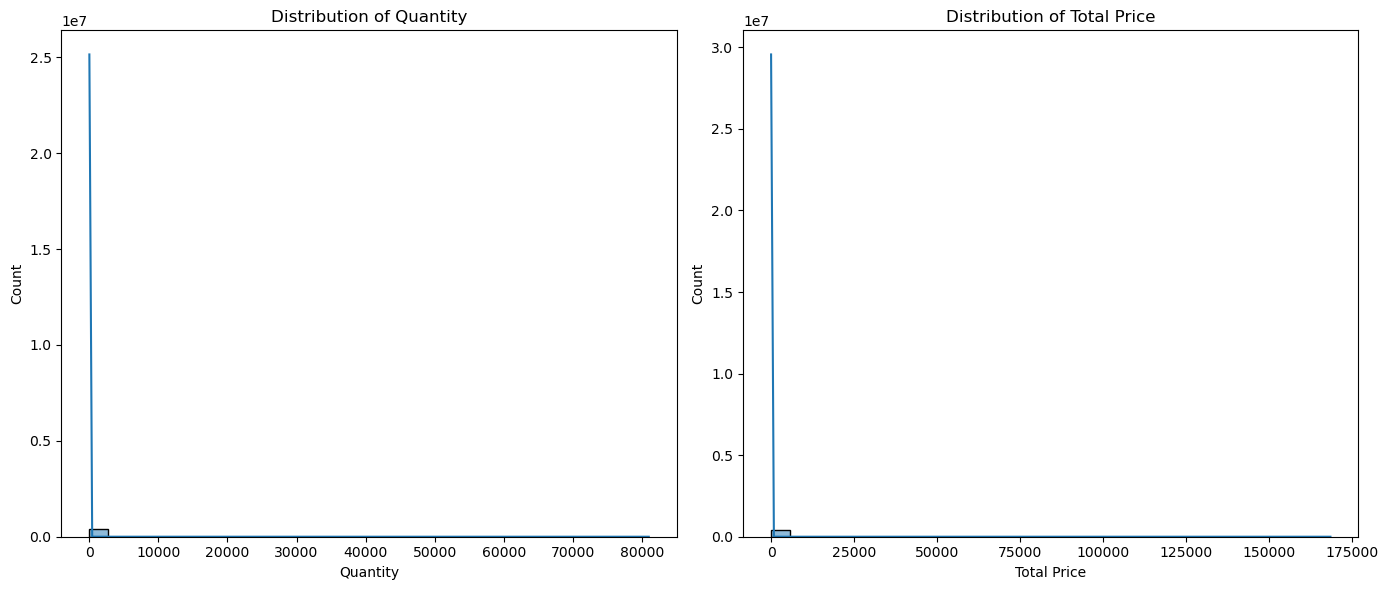

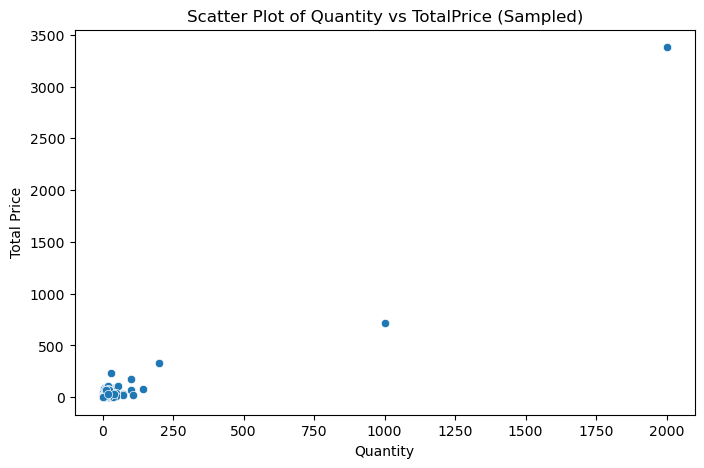

In [21]:

# Plotting the distribution of Quantity and TotalPrice
plt.figure(figsize=(14, 6))

# Distribution of Quantity
plt.subplot(1, 2, 1)
sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")

# Distribution of Total Price
plt.subplot(1, 2, 2)
sns.histplot(data['TotalPrice'], bins=30, kde=True)
plt.title("Distribution of Total Price")
plt.xlabel("Total Price")

plt.tight_layout()
plt.show()

# Scatter plot for a random sample to see relationship between Quantity and TotalPrice
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Quantity', y='TotalPrice', data=data.sample(500, random_state=42))
plt.title("Scatter Plot of Quantity vs TotalPrice (Sampled)")
plt.xlabel("Quantity")
plt.ylabel("Total Price")
plt.show()



"""
## 5. Aggregate Data by Customer

Since our goal is to segment customers, we aggregate the transaction data to the customer level.
For each `CustomerID`, we calculate:
- **Total Spending:** Sum of `TotalPrice`
- **Total Quantity Purchased:** Sum of `Quantity`
"""


In [22]:
# %% code
# Group the data by CustomerID and aggregate TotalPrice and Quantity
grouped_data = data.groupby('CustomerID').agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()

# Print the shape and preview the aggregated data
print("Aggregated customer data shape:", grouped_data.shape)
grouped_data.head()


Aggregated customer data shape: (4338, 3)


,CustomerID,TotalPrice,Quantity
0,12346.0,77183.60,74215
1,12347.0,4310.00,2458
2,12348.0,1797.24,2341
3,12349.0,1757.55,631
4,12350.0,334.40,197



"""
## 6. Visualize Aggregated Customer Data

Now we visualize the aggregated data to understand the overall spending behavior of customers.
We use a scatter plot of:
- **X-axis:** Total Quantity Purchased
- **Y-axis:** Total Spending
"""


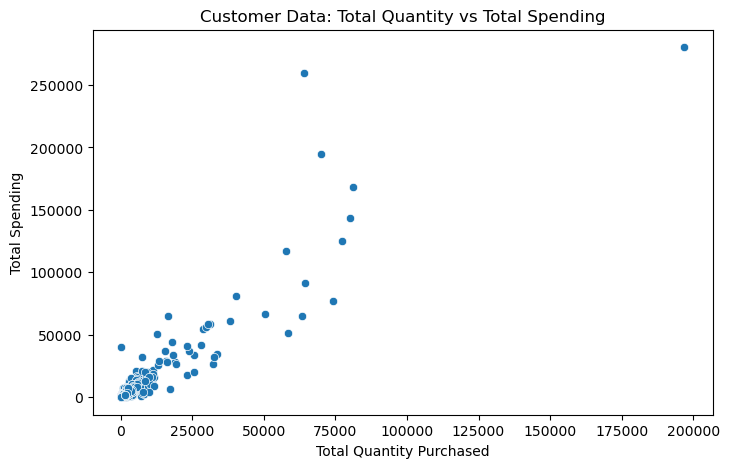

In [23]:
# %% code
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Quantity', y='TotalPrice', data=grouped_data)
plt.title("Customer Data: Total Quantity vs Total Spending")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Spending")
plt.show()



"""
## 7. Data Preprocessing

Before applying clustering, we standardize the features (`TotalPrice` and `Quantity`) so that both contribute equally.
This is done using `StandardScaler` which transforms the data to have a mean of 0 and a standard deviation of 1.
"""


In [24]:
# %% code
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the aggregated features
scaled_data = scaler.fit_transform(grouped_data[['TotalPrice', 'Quantity']])



"""
## 8. Apply K-Means Clustering

We apply the K-Means algorithm to the standardized data to segment the customers.
- **K-Means:** This algorithm partitions data into K clusters by minimizing the variance within each cluster.
- **n_clusters:** Here, we assume an optimal value of 3 (this can be chosen based on the elbow method or domain knowledge).
After clustering, each customer is assigned a cluster label.
"""


In [25]:

# Assume the optimal number of clusters is 3 (in practice, one can use the elbow method)
optimal_k = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model and predict the cluster for each customer
grouped_data['Cluster'] = kmeans.fit_predict(scaled_data)



"""
## 9. Visualize Clusters on the Original Feature Space

With the clusters assigned, we now visualize how customers group in the original feature space (Total Quantity vs Total Spending).
Different colors represent different clusters.
"""


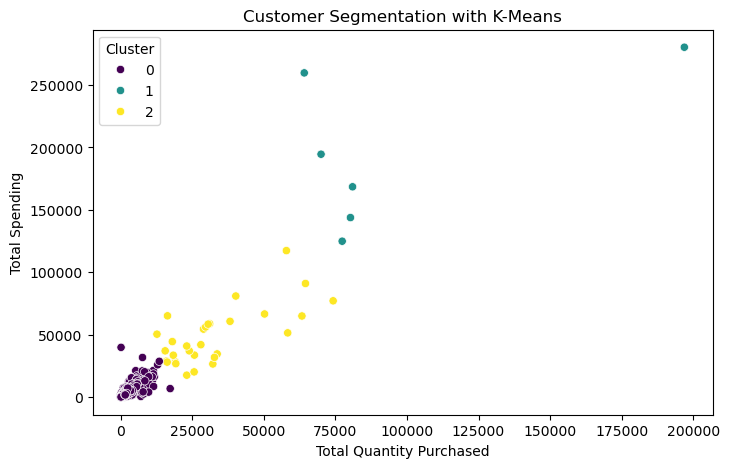

In [26]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Quantity', y='TotalPrice', hue='Cluster', palette='viridis', data=grouped_data)
plt.title("Customer Segmentation with K-Means")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Spending")
plt.legend(title="Cluster")
plt.show()


"""
## 10. Dimensionality Reduction with PCA and Visualization

Since our original features are only two, PCA might seem optional. However, PCA is often useful when you have more dimensions.
Here we:
- Apply **PCA** to reduce the standardized data to 2 principal components.
- Add these PCA features back into our dataframe.
- Visualize the clusters in the PCA-reduced space to observe any underlying structure.
"""


In [27]:

# Initialize PCA to reduce data to 2 components
pca = PCA(n_components=2)

# Fit PCA on the standardized data and transform it
pca_result = pca.fit_transform(scaled_data)

# Add the PCA results as new columns in the dataframe
grouped_data['PCA1'] = pca_result[:, 0]
grouped_data['PCA2'] = pca_result[:, 1]

# Display the explained variance ratio of the principal components
print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)


Explained variance ratio by PCA components: [0.96145329 0.03854671]


"""
### Visualizing the PCA Results
The scatter plot below shows customer clusters based on the two principal components.
This view can help confirm the separation and structure discovered by K-Means.
"""


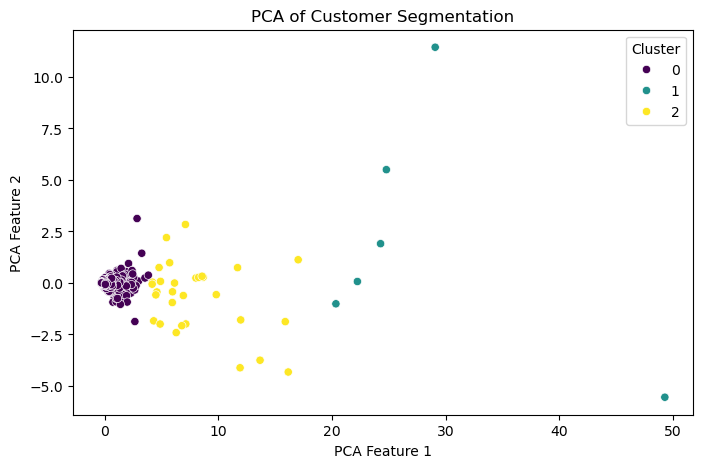

In [28]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=grouped_data)
plt.title("PCA of Customer Segmentation")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend(title="Cluster")
plt.show()


"""
## 11. Conclusion and Insights

In this notebook, we performed the following steps:
- **Data Loading & Cleaning:** We loaded a retail dataset and removed invalid transactions.
- **Visualization of Raw Data:** We examined the distributions of transaction quantities and prices.
- **Customer Aggregation:** We grouped the data by customer to obtain total spending and quantity.
- **Data Standardization:** We standardized the features to ensure equal weighting in clustering.
- **K-Means Clustering:** We segmented customers into 3 clusters based on their aggregated behavior.
- **PCA Visualization:** We reduced the data to 2 dimensions and visualized the clusters.

### What We Learned:
- **Customer Behavior Insights:** Different clusters may represent high spenders, bulk buyers, or occasional shoppers.
- **Actionable Insights:** These segments can be used for targeted marketing strategies, personalized offers, and improved customer service.
- **The Power of Visualization:** Visualizing data before and after clustering helps validate the effectiveness of the segmentation.


"""
